#### Boot cell

Skip if `module_update.py` is in same folder as notebook, next cell downloads this file which in turn will download other files.

In [45]:
! curl -s "https://raw.githubusercontent.com/Yoonsen/Modules/master/module_update.py" > "module_update.py"

#### Get essentials

Import text and graph modules for analysis, and css for display

In [46]:
from module_update import update, css, code_toggle, printmd

In [47]:
css()

### Start med å importere modulene

In [48]:
update('graph_networkx_louvain', overwrite=True)
update('nbtext', overwrite=True)
import nbtext as nb
import graph_networkx_louvain as gnl
import networkx as nx
from graph_networkx_louvain import cutdown, make_collocation_graph
from collections import Counter

Updated file `C:\Users\larsj\Documents\Notebookprosjekter\graph_networkx_louvain.py`

Updated file `C:\Users\larsj\Documents\Notebookprosjekter\nbtext.py`

In [49]:
import imp

In [50]:
imp.reload(nb)

<module 'nbtext' from 'C:\\Users\\larsj\\Documents\\Notebookprosjekter\\nbtext.py'>

In [51]:
nb.word_lemma('fiskende')

[['adj', 'fiske']]

In [52]:
nb.word_paradigm('fiske')

[['adj', ['fiska', 'fiskede', 'fiskende', 'fisket', 'fiskete']],
 ['subs', ['fiska', 'fiske', 'fiskene', 'fisker', 'fisket']],
 ['verb', ['fisk', 'fiska', 'fiske', 'fisker', 'fiskes', 'fisket']]]

In [53]:
import warnings
warnings.filterwarnings('ignore')

In [54]:
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


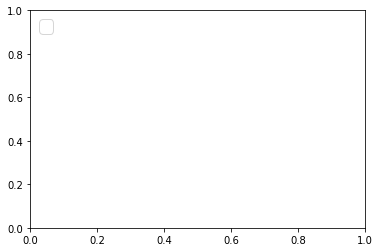

In [55]:
plt.legend(loc=2, prop={'size': 18})

# Aggregerte data, trendlinjer og ordmodeller fra ngram




### Trendlinjer 

Data inntil trigram.

In [179]:
nb.book_urn(author='collett%cami%')

[[2012051524002, 'Collett, Camilla', 'Amtmannens döttrar', 1983],
 [2007122100036, 'Collett, Camilla', 'I de lange Nætter', 1994],
 [2010102906097, 'Collett, Camilla', 'Amtmannens døtre', 1946],
 [2009071512001, 'Collett, Camilla', 'Camilla Colletts Skrifter', 1892],
 [2009072912001, 'Collett, Camilla', 'Camilla Colletts Skrifter', 1892],
 [2009072812001, 'Collett, Camilla', 'Under långa nätter', 1866],
 [2006083100087,
  'Collett, Camilla',
  'Amtmannens døtre ; og I de lange Nætter',
  1963],
 [2009011903024, 'Collett, Camilla', 'Camilla Colletts Skrifter', 1893],
 [2014073108005, 'Collett, Camilla', 'Amtmannens døtre', 1992],
 [2009071312001, 'Collett, Camilla', 'Samlede verker', 1913],
 [2016071848032,
  'Collett, Camilla',
  'Amtmannens døtre ; I de lange netter',
  1987],
 [2014021008064, 'Collett, Camilla', 'Dagbøker og breve', 1932],
 [2014082508248,
  'Collett, Camilla',
  'Camilla Collett &amp; Harriet Backer',
  2002],
 [2009072412001, 'Collett, Camilla', 'Camilla Colletts S

In [168]:
urn = nb.metadata("2008030702001")

In [181]:
nb.urn_concordance(word='hun', urns= [2010102906097, 'Collett, Camilla', 'Amtmannens døtre', 1946], before=10, after=12)

"Amtmannens døtre, Collett, Camilla, 1946","ut av et hjørneskap noen glass og kopper , som",hun,"ivrig begynte å pusse . Under dette arbeide , hvortil hun gav"
"Amtmannens døtre, Collett, Camilla, 1946","ivrig begynte å pusse . Under dette arbeide , hvortil",hun,gav sig bedre tid enn hennes plikter som vertinne syntes å tillate
"Amtmannens døtre, Collett, Camilla, 1946","enn hennes plikter som vertinne syntes å tillate , betraktet",hun,den hvilende på sofaen med umiskjennelig nysgjerrige blikk . Denne var en
"Amtmannens døtre, Collett, Camilla, 1946","borte ; den har lang vei matro , » utbrøt",hun,endelig .
"Amtmannens døtre, Collett, Camilla, 1946",Lettet ved den gjorte begynnelse tilføiet,hun,:


In [182]:
collett_ref = nb.aggregate_urns(nb.book_urn(ddk="839%", period=(1930, 1950), limit=200))

In [183]:
collet_words = nb.get_freq( [2010102906097, 'Collett, Camilla', 'Amtmannens døtre', 1946],0,0)

In [185]:
collett_w = nb.frame(collet_words)

In [188]:
collett_r = nb.frame(collett_ref)

In [206]:
bag = list((collett_w[0]**1.5/collett_r[0]).sort_values(ascending=False)[:1000].index)

In [218]:
bag

['måskje',
 'Dorthe',
 'Måskje',
 'Brøcher',
 'Lorenz',
 'Kold',
 'Sofie',
 'Sofies',
 'Breien',
 'omgivelse',
 'Synneve',
 'Møllerup',
 'grotten',
 'Amalie',
 'Amalies',
 'Brandt',
 'smukk',
 'Ramm',
 'Kolds',
 'blott',
 'Stavnem',
 'Brandts',
 'Muller',
 'Ada',
 'strebte',
 'Bah',
 'lykketreff',
 'førenn',
 'amtmannen',
 'Miiller',
 'Ramms',
 'nedla',
 'forekommenhet',
 'vannfarve',
 'beriket',
 'fruentimmers',
 'tårestrøm',
 'Abailard',
 'übevegelighet',
 'inngjød',
 'simpelhet',
 'smakfull',
 'subjekter',
 'beskjeftigelser',
 'forskutt',
 'Møllerups',
 'amtmannens',
 'sådan',
 'Krøsus',
 'tillikemed',
 'prydelse',
 'forskruede',
 'Lilleholt',
 'råheten',
 'DØTRE',
 'Amtmannens',
 'ennu',
 'Rein',
 'forskrekke',
 'lilles',
 'ventedes',
 'almisse',
 'bevoktet',
 'prosten',
 'Prosten',
 'Louises',
 'besvart',
 'Miillers',
 'sådant',
 'motbydelighet',
 'aftensbord',
 'opheftet',
 'legemsstørrelse',
 'vanhelligelse',
 'opblussende',
 'ylle',
 'manøvre',
 'fattigkommisjonen',
 'hendrages

In [216]:
G=nb.make_network( [2010102906097, 'Collett, Camilla', 'Amtmannens døtre', 1946],bag, cutoff=50)

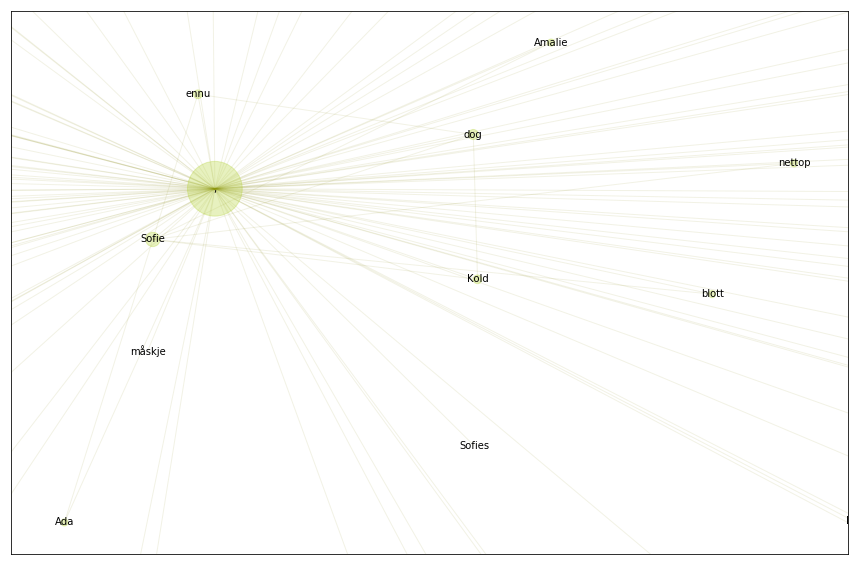

In [217]:
gnl.show_graph(G)

In [215]:
gnl.show_communities(G)

,-Sofie :  ,, Sofie, Kold, dog, ennu, måskje, nettop, Amalie, sådan, øieblikk, blott, Brandt, pike, Lorenz, Muller, amtmannen, Sofies, Dorthe, Ada, Ramm, trådte, hvori, likeså, værelse, Brøcher, vannfarve, opsteg, opstrøkne, sjelsstyrke, umulighet, Ethvert, Prosten, fruens, mimose, gjestfri, livskår, råheten, tilstander, borgerfolk, frisyrer, elskverdigere, besinne, gjestmilde, beseire, tilskyndelser, vrå, nedla, forskutt, tilfluktssteder, Neppe, nederdrektige, fornektelsens, tilføiet, hårvekst, ytterligheter, bekvemmelighet, oven-, fatalere, gjøkesyren, opstilte, åen, ødeleggelsens, prosten, marmorbordet, forspille, atlask, overveid, Møllerup, lumpneste, frembød, livlighet, forskrekke, forinnen, gratie, utheve, grunnpillene, elskverdighet, seilbåter, forhøiede, hvelving, skjulteste, opdragelse,, subjekter, Louises, rokkene, forsagelse, livsplan, gemyttene, portretter, skilderiene, forskruede, gammelaktig, gjenstander, vanhelligelse, edelsten, henrev, fjellvegger, nærværelse, Vemodig, 

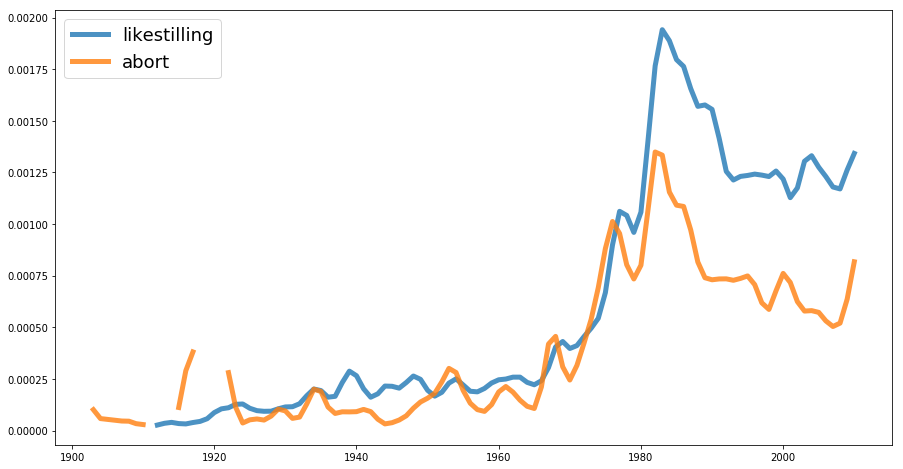

In [56]:
nb.nb_ngram("likestilling, abort", years=(1900, 2010), smooth=4, mode='rel').plot(figsize=(15,8), lw=5, alpha=0.8);
plt.legend(loc=2, prop={'size': 18})
plt.savefig('likestilling-abort.jpg')

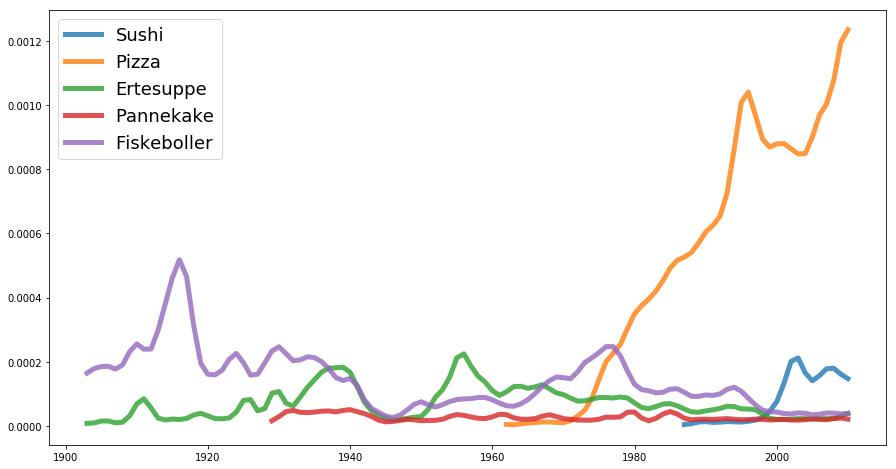

In [57]:
nb.nb_ngram("Sushi, Pizza, Ertesuppe, Pannekake, Fiskeboller", years=(1900, 2010), smooth=4, mode='rel', corpus='avis').plot(figsize=(15,8), lw=5, alpha=0.8);
plt.legend(loc=2, prop={'size': 18})
plt.savefig('sushi-pizza.jpg')

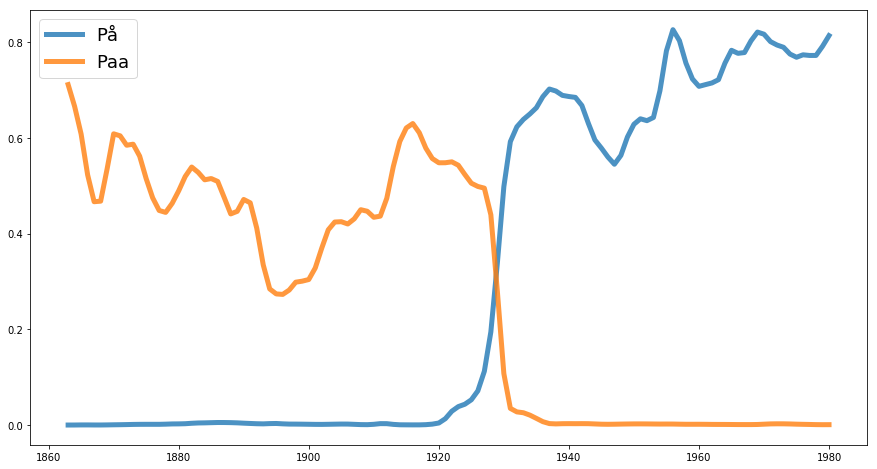

In [58]:
nb.nb_ngram("På, Paa", years=(1860, 1980), smooth=4, mode='rel', corpus='avis').plot(figsize=(15,8), lw=5, alpha=0.8);
plt.legend(loc=2, prop={'size': 18})
plt.savefig('på-paa.jpg')

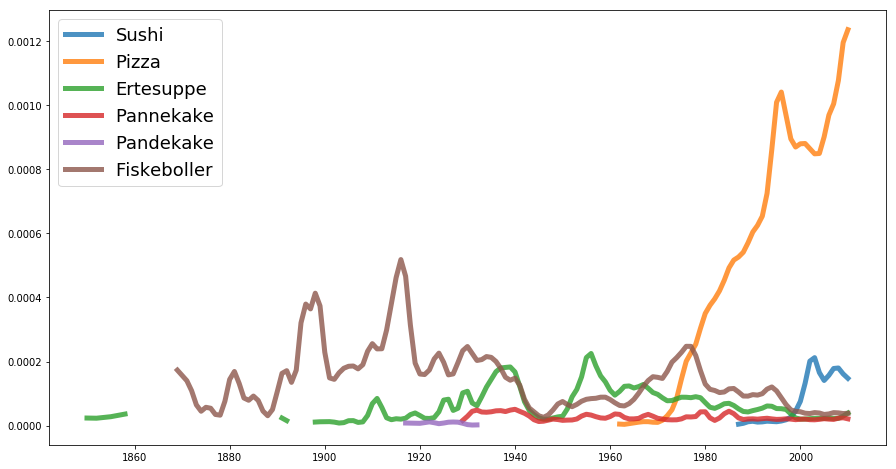

In [59]:
nb.nb_ngram("Sushi, Pizza, Ertesuppe, Pannekake, Pandekake, Fiskeboller", years=(1800, 2010), smooth=4, mode='rel', corpus='avis').plot(figsize=(15,8), lw=5, alpha=0.8);
plt.legend(loc=2, prop={'size': 18})
plt.savefig('sushi-pizza.jpg')

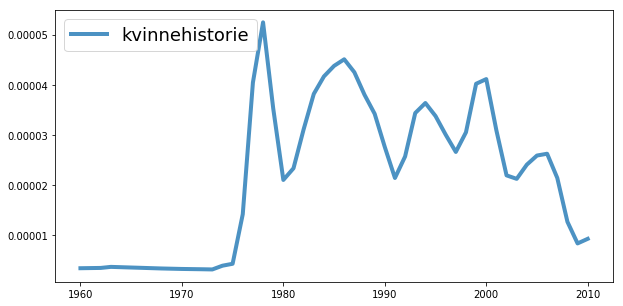

In [60]:
nb.nb_ngram("kvinnehistorie", years=(1850, 2010), smooth=4, mode='rel').plot(figsize=(10,5), lw=4, alpha=0.8);
plt.legend(loc=2, prop={'size': 18})

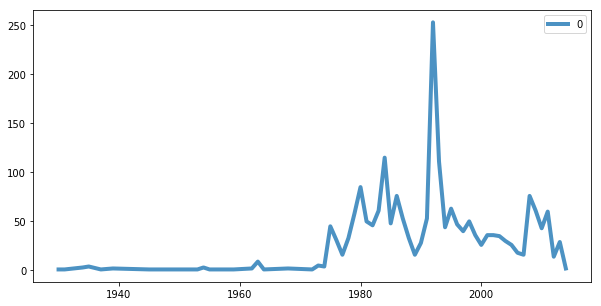

In [61]:
nb.unigram("kvinnehistorie", period=(1850, 2015), media='avis').plot(figsize=(10,5), lw=4, alpha=0.8);

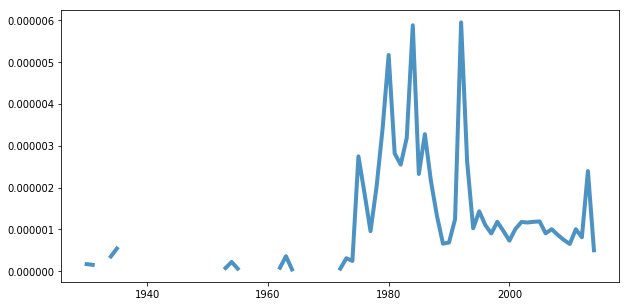

In [62]:
(nb.unigram("kvinnehistorie", period=(1850, 2015), media='avis')[0]/nb.unigram('.', period=(1850, 2015), media='avis')[0]).plot(figsize=(10,5), lw=4, alpha=0.8);

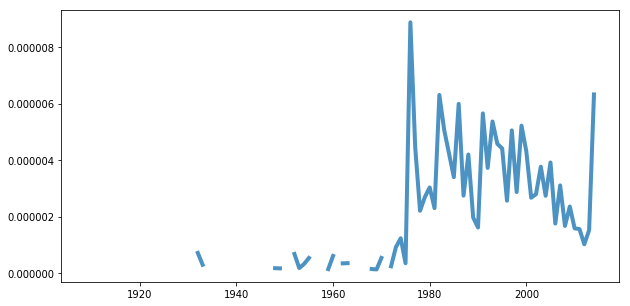

In [63]:
(nb.unigram("kvinnehistorie", period=(1850, 2015), media='bok')[0]/nb.unigram('.', period=(1850, 2015), media='bok')[0]).plot(figsize=(10,5), lw=4, alpha=0.8);

In [67]:
nb.unigram("kvinnehistorie")[0]/nb.unigram(',')[0]

1950             NaN
1951             NaN
1952    8.354744e-07
1953    2.127503e-07
1954    3.920074e-07
1955    6.639267e-07
1956             NaN
1957             NaN
1958             NaN
1959    1.694015e-07
1960    7.574177e-07
1961             NaN
1962    4.023295e-07
1963    3.953784e-07
1964             NaN
1965             NaN
1966             NaN
1967             NaN
1968    1.634685e-07
1969    1.537824e-07
1970    6.536931e-07
1971             NaN
1972    3.006138e-07
1973    1.184307e-06
1974    1.566275e-06
1975    4.242087e-07
1976    1.107572e-05
1977    5.757680e-06
1978    2.740239e-06
1979    3.371140e-06
            ...     
1988    5.373769e-06
1989    2.480235e-06
1990    2.066642e-06
1991    7.262884e-06
1992    4.668980e-06
1993    6.707297e-06
1994    5.661782e-06
1995    5.385012e-06
1996    3.194377e-06
1997    6.194670e-06
1998    3.515649e-06
1999    6.344994e-06
2000    5.081137e-06
2001    3.153469e-06
2002    3.327225e-06
2003    4.455325e-06
2004    3.154

In [68]:
def unigrams(words, period=(1800, 2020), media='bok', ddk=None, topic=None, gender=None):
    import pandas as pd
    df = pd.DataFrame()
    for w in words:
        d = nb.unigram(w, period=period, media=media, ddk=ddk, topic=topic, gender=gender)
        if not d.empty:
            df[w] = d[0]
    return df.fillna(0)

In [69]:
kh = unigrams('kvinnehistorier Kvinnehistorier kvinnehistorie Kvinnehistorie'.split())

In [70]:
kh['sum'] = kh.sum(axis=1)

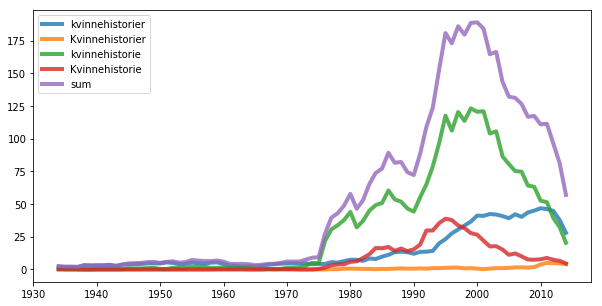

In [71]:
kh.rolling(window=5).mean().plot(figsize=(10,5), lw=4, alpha=0.8);

In [72]:
nb.concordance('Kvinnehistorie', yearfrom=2000, corpus='bok', before=10, after=10)

"Simensen, Jarle,Internasjonalisering i historiefaget,2008",et « overlys » til studiet av norske emner .,Kvinnehistorie,", teknologihistorie og befolkningshistorie er av nødvendighet internasjonalt orientert ,"
"Vik, Gudrun,Evaluering av ABM-utvikling,2008",tekstil • Handverk • Herregårdsnettverket • Kulturlandskap • Kunstnettverket •,Kvinnehistorie,• Kystkultur • Landbruksnettverket • Litteraturnettverket • Luftfart • Magasin
"Elstad, Åsa,Arbeidsliv i fiskarbondehushald,2002","Avdem , Ann Jorunn 1988 : """,Kvinnehistorie,"i lokalhistoria "" , Heimen , nr. 4 - 1988"
",Kjønn og likestilling i skolen,2000","Fløystad , Ingeborg ( 1990 ) .",Kvinnehistorie,"i Norge , en bibliografi . L Historisk tidsskrift nr."
",Kjønn og likestilling i skolen,2000","Vogt , Sissel ( 1983 ) .",Kvinnehistorie,i lærebøker - og i forskningen . I : Breines
",Historiedidaktikk i Norden 7,2000",utviklingen til ytterligere trengsel for konger og store menn .,Kvinnehistorie,kom inn i lærebøkene ved et departementskrav da feminismen hadde


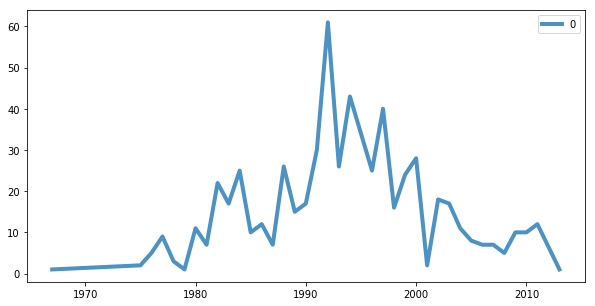

In [73]:
nb.unigram("Kvinnehistorie", period=(1850, 2015), media='bok').plot(figsize=(10,5), lw=4, alpha=0.8);

In [74]:
nb.concordance(word="kvinnehistorie", yearfrom=1980, yearto=2000, corpus='avis')

jaerbladet-19920224,. Cappelen : Vårliste med,kvinnehistorie,* V AUDUN SKRYTEN Cappelen
jaerbladet-19940615,kistebotnen . Korsettet fortel også,kvinnehistorie,", kvinnene snørte seg inn"
jaerbladet-19960112,frå Pontis . Ei nyare,kvinnehistorie,frå Sandnes understreka etter aktor
jaerbladet-19960927,Norges Bondekvinnelag . Utstillingane er,kvinnehistorie,sett i scene ved hjelp
jaerbladet-19800318,frå Mozambique . « Afrikansk,kvinnehistorie,» . Kåseri ved Eli
stavangeraftenblad-19910219,Ida Blom vært professor i,kvinnehistorie,. Hun har hatt en
stavangeraftenblad-19910710,Bryan Brown . Uhyre komplisert,kvinnehistorie,om seksuelt frustrert hustru som
stavangeraftenblad-19910510,"og II » , om",kvinnehistorie,og kvinnelitteratur ; « Vi
stavangeraftenblad-19910302,foredraget som tar for seg,kvinnehistorie,fra 1600 - 1889. Janneken
stavangeraftenblad-19910302,og skal holde foredrag om,kvinnehistorie,. Redigert av ! Helge
klassekampen-19920529,sender Utbildingsradioen et kurs i,kvinnehistorie,. 19.30 : Rapport med


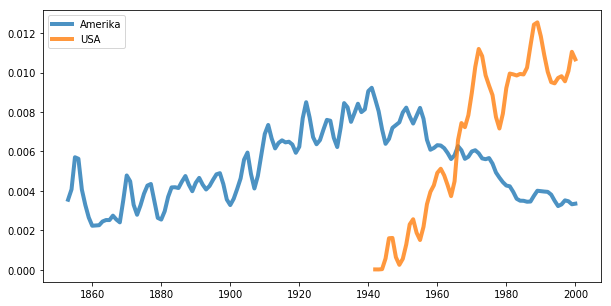

In [75]:
nb.nb_ngram("Amerika, USA", years=(1850, 2000),corpus='bok', smooth=4, mode='rel').plot(figsize=(10,5), lw=4, alpha=0.8);

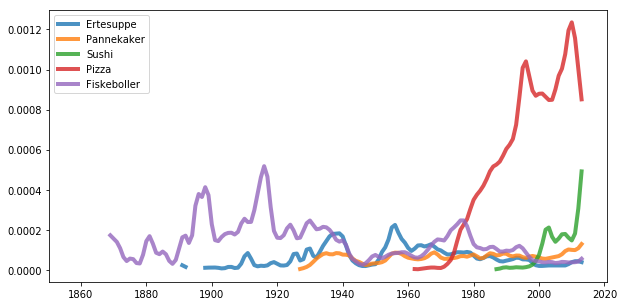

In [76]:
nb.nb_ngram("Ertesuppe, Pannekaker, Sushi, Pizza, Fiskeboller", years=(1850, 2020),corpus='avis', smooth=4, mode='rel').plot(figsize=(10,5), lw=4, alpha=0.8);

In [77]:
def ordnett(w, cutoff=12, lang='nob'):
    G = nb.make_graph(w, cutoff=cutoff, lang=lang)
    gnl.show_graph(G, spread=1.2, fontsize=14);
    gnl.show_communities(G)
    return G

In [78]:
tot = nb.frame(nb.totals(60000))

ansiktet-brystet :  ansiktet, brystet, halsen, hendene, magen, kroppen, hodet, nakken

overgrep-mishandling :  overgrep, mishandling, drap, tortur, voldtekt, seksuelle, omsorgssvikt, voldtekter, mord, kidnapping, korrupsjon, incest, fysiske, bortføring, maktmisbruk, krenkelser, vanskjøtsel

slag-spark :  slag, spark, hjerteinfarkt, støt, stot, sans, gips, hogg, spring, Kom, støv, hugg, kreft, interesse, angina, sammenlagt, lungekreft, hastigheter, lugging, bitt, nøyaktighet, vibrasjoner, hjerneslag, krykker, spenn, ørefiker, rykk, utenpåsatte, Slag, knyttnever

krave-krage :  krave, krage, forkanter, ermer, muffe, lommeklaffer, lommer, lue, oppslag, kappe, mansjetter

størrelser-typer :  størrelser, typer, varianter, utførelser, farger, kvaliteter, prisklasser, modeller, farver, fasonger

vold-kriminalitet :  vold, kriminalitet, sex, brutalitet, rus, narkotika, rusmisbruk, dop, prostitusjon, alkohol, urettferdighet, ondskap, psykiatri, erotikk, råskap, stoffmisbruk, ungdom, traumatisk


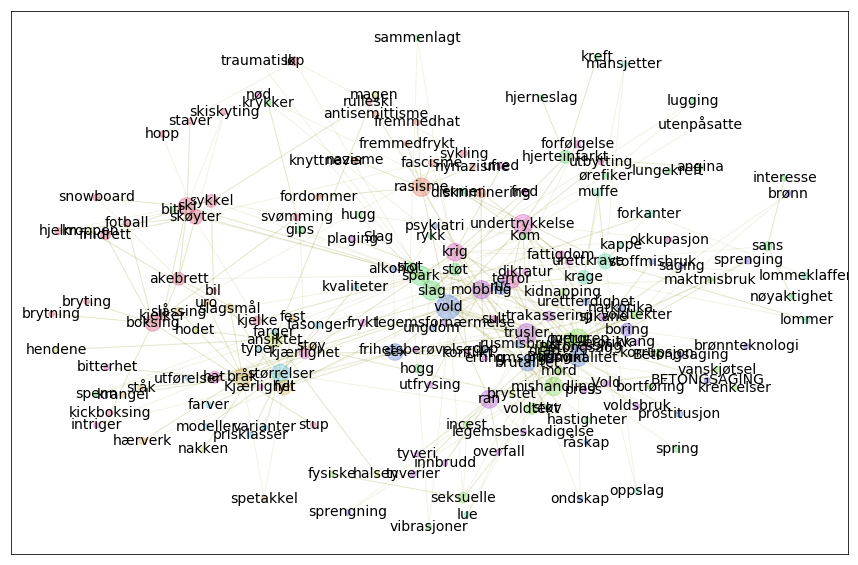

In [106]:
voldsord = ordnett('slag, spark, vold')

Frost-Kälte :  Frost, Kälte, Reif, Glut, Nässe, Hagel, Eisgang, Hitze, Tauwetter, Tau, Nebel, Zugluft, Asche, Schneegestöber, Schneefall, Innigkeit, Gefühllosigkeit

Schnee-Gletscher :  Schnee, Gletscher, Gletschern, Firn, Lawinen, Firnen, Glatteis, Firnfeldern, Graupeln, Inlandeis, Schneefeldern, Firnfelder, Firne, Schneefelder, Gletschereis, Eisberge

Eis-Hochwasser :  Eis, Hochwasser, Regen, Schmelzwasser, Niedrigwasser

Kuchen-Limonade :  Kuchen, Limonade, Kaffee, Kekse, Torten, Bier, Gebäck

Opium-Kampher :  Opium, Kampher, Morphium, Haschisch, Morphin, Belladonna, Campher

Kochsalz-Alaun :  Kochsalz, Alaun, Salpeter, Harnstoff, Glaubersalz, Salmiak

Fels-Hort :  Fels, Hort, Schutt, Geröll



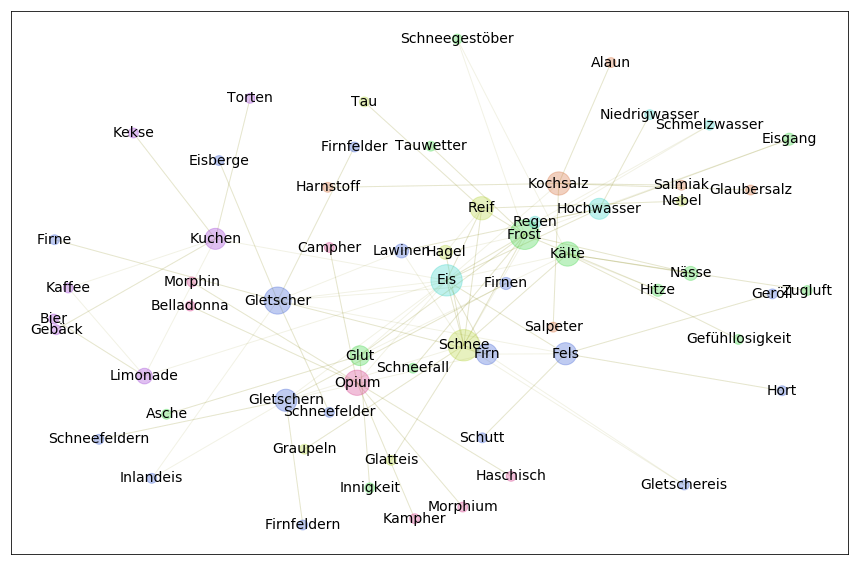

In [80]:
G = ordnett('Eis', cutoff=16, lang='ger');

In [81]:
gnl.show_cliques(G)

(3, 1) Limonade, Eis, Kaffee, Kuchen

(3, 2) Firn, Glut, Gletschern, Frost, Schnee, Reif, Hagel, Fels, Eis, Kälte, Gletschereis, Gletscher

(4, 1) Fels, Firn, Eis, Gletscher

(4, 2) Hagel, Frost, Schnee, Reif, Eis

(4, 3) Schnee, Firn, Eis, Gletschern



snekker-tømmermann :  snekker, tømmermann, flislegger, seilbåter

daycruisere-cabincruisere :  daycruisere, cabincruisere, skjærgårdsjeeper



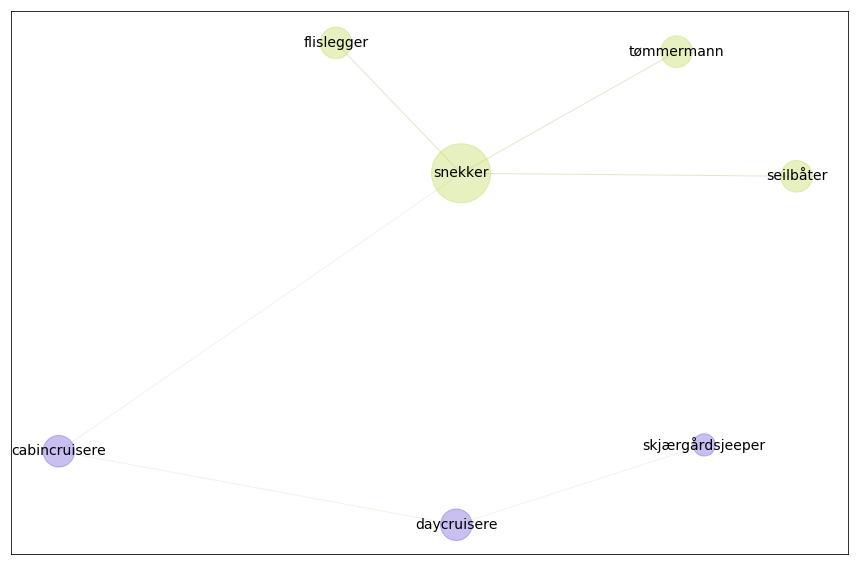

In [82]:
ordnett('cabincruisere, daycruisere')

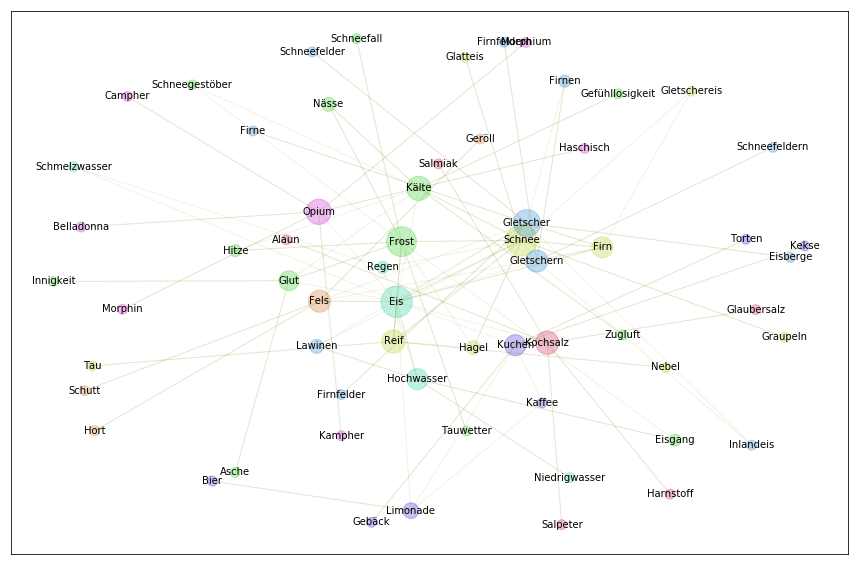

In [83]:
gnl.show_graph(G, spread=1.6)

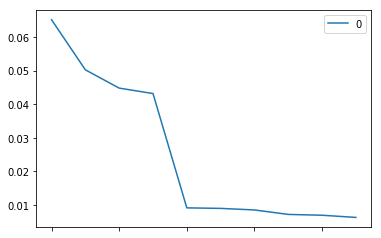

In [165]:
prod = nb.frame(dict(nx.degree_centrality(voldsord)))*nb.frame(dict(nx.betweenness_centrality(voldsord)))
prod.sort_values(by=0, ascending=False)[:10].plot()

In [130]:
def sentrale_fra_graf(G):
    cluster = gnl.community_dict(G)
    #print(cluster)
    sentrale = { cluster[x][0] for x in cluster}
    return sentrale

In [121]:
sentrale = sentrale_fra_graf(voldsord)

{'ansiktet-brystet': ['ansiktet', 'brystet', 'halsen', 'hendene', 'magen', 'kroppen', 'hodet', 'nakken'], 'overgrep-mishandling': ['overgrep', 'mishandling', 'drap', 'tortur', 'voldtekt', 'seksuelle', 'omsorgssvikt', 'voldtekter', 'mord', 'kidnapping', 'korrupsjon', 'incest', 'fysiske', 'bortføring', 'maktmisbruk', 'krenkelser', 'vanskjøtsel'], 'slag-spark': ['slag', 'spark', 'hjerteinfarkt', 'støt', 'stot', 'sans', 'gips', 'hogg', 'spring', 'Kom', 'støv', 'hugg', 'kreft', 'interesse', 'angina', 'sammenlagt', 'lungekreft', 'hastigheter', 'lugging', 'bitt', 'nøyaktighet', 'vibrasjoner', 'hjerneslag', 'krykker', 'spenn', 'ørefiker', 'rykk', 'utenpåsatte', 'Slag', 'knyttnever'], 'krave-krage': ['krave', 'krage', 'forkanter', 'ermer', 'muffe', 'lommeklaffer', 'lommer', 'lue', 'oppslag', 'kappe', 'mansjetter'], 'størrelser-typer': ['størrelser', 'typer', 'varianter', 'utførelser', 'farger', 'kvaliteter', 'prisklasser', 'modeller', 'farver', 'fasonger'], 'vold-kriminalitet': ['vold', 'krimin

In [122]:
sentrale

{'ansiktet',
 'boring',
 'bråk',
 'krave',
 'overgrep',
 'rasisme',
 'ski',
 'slag',
 'størrelser',
 'trusler',
 'undertrykkelse',
 'vold'}

In [150]:
nx.voronoi.voronoi_cells(voldsord, sentrale_fra_graf(voldsord))

{'slag': {'angina',
  'hjerneslag',
  'hjerteinfarkt',
  'krage',
  'kreft',
  'lommeklaffer',
  'lungekreft',
  'mansjetter',
  'muffe',
  'sammenlagt',
  'slag',
  'stot',
  'støt',
  'støv',
  'utenpåsatte',
  'vibrasjoner'},
 'boring': {'boring', 'brønn', 'brønnteknologi', 'sprenging', 'sprengning'},
 'ski': {'friidrett', 'kjelker', 'ski', 'skiskyting', 'snowboard', 'staver'},
 'størrelser': {'farger',
  'farver',
  'fasonger',
  'hastigheter',
  'kvaliteter',
  'modeller',
  'prisklasser',
  'størrelser',
  'typer',
  'utførelser',
  'varianter'},
 'rasisme': {'alkohol',
  'antisemittisme',
  'brutalitet',
  'dop',
  'erotikk',
  'erting',
  'fascisme',
  'fordommer',
  'fremmedfrykt',
  'fremmedhat',
  'frykt',
  'intriger',
  'korrupsjon',
  'kriminalitet',
  'mobbing',
  'narkotika',
  'nazisme',
  'nynazisme',
  'ondskap',
  'plaging',
  'prostitusjon',
  'rasisme',
  'rusmisbruk',
  'råskap',
  'sex',
  'sjikane',
  'stoffmisbruk',
  'terror',
  'utfrysing'},
 'ansiktet': {'a

In [126]:
gnl.community_dict(voldsord)

{'ansiktet-brystet': ['ansiktet',
  'brystet',
  'halsen',
  'hendene',
  'magen',
  'kroppen',
  'hodet',
  'nakken'],
 'overgrep-mishandling': ['overgrep',
  'mishandling',
  'drap',
  'tortur',
  'voldtekt',
  'seksuelle',
  'omsorgssvikt',
  'voldtekter',
  'mord',
  'kidnapping',
  'korrupsjon',
  'incest',
  'fysiske',
  'bortføring',
  'maktmisbruk',
  'krenkelser',
  'vanskjøtsel'],
 'slag-spark': ['slag',
  'spark',
  'krave',
  'krage',
  'hjerteinfarkt',
  'støt',
  'stot',
  'forkanter',
  'ermer',
  'gips',
  'hogg',
  'muffe',
  'lommeklaffer',
  'spring',
  'Kom',
  'lommer',
  'støv',
  'hugg',
  'kreft',
  'angina',
  'sammenlagt',
  'lungekreft',
  'hastigheter',
  'lugging',
  'oppslag',
  'mansjetter',
  'bitt',
  'kappe',
  'vibrasjoner',
  'hjerneslag',
  'krykker',
  'lue',
  'spenn',
  'ørefiker',
  'rykk',
  'utenpåsatte',
  'Slag',
  'knyttnever'],
 'størrelser-typer': ['størrelser',
  'typer',
  'varianter',
  'utførelser',
  'farger',
  'kvaliteter',
  'pris

In [85]:
korpus = nb.book_urn(ddk='230%', period=(1960, 2020), limit=50)
nb.urn_concordance(word='sakramentene', urns=korpus, size=5)

"Tanker om tvil og tro, Ringnes, Haagen, 1969",og for hvem Gud og,sakramentene,er hellige realiteter — og
"Teologi i kirkens rom, , 2001",rett forvaltning av Ordet og,sakramentene,. En har fått bekreftet
"Teologi i kirkens rom, , 2001",evangelium og en forvaltning av,sakramentene,i overensstemmelse med Kristi innstiftelse
"Teologi i kirkens rom, , 2001",Guds ord forkynnes rent og,sakramentene,forvaltes rett i dette fellesskapet
"Teologi i kirkens rom, , 2001",evangeliets lære og forvaltningen av,sakramentene,» . Dette innebærer at
"Teologi i kirkens rom, , 2001",evangeliets lære og forvaltningen av,sakramentene,"» , vil den økumeniske"
"Tro og lære, Moe, Steinar, 1994",10.4 . Om,sakramentene,147
"Tro og lære, Moe, Steinar, 1994",rett om evangeliet og der,sakramentene,"blir forvaltet rett , der"
"Tro og lære, Moe, Steinar, 1994",nådemidlene ( Guds ord og,sakramentene,) blir troen lett en
"Tro og lære, Moe, Steinar, 1994",Guds ord er sammen med,sakramentene,midler (instrumenter) for Anden (
"Tro og lære, Moe, Steinar, 1994",der evangeliet læres rent og,sakramentene,forvaltes rett . Til kirkens


In [86]:
def term_extract(ddk=None, subject=None, title=None, total=None, period=(1960,2020), limit=50, factor=10):
    korp_ddk = nb.book_urn(ddk=ddk, subject=subject, title=title, limit=limit, period=period)
    print(korp_ddk[:5])
    ddk_agg = nb.get_aggregated_corpus(korp_ddk)
    result = nb.frame((ddk_agg[0]/total[0]).sort_values(ascending=False), ddk)
    cut = result.loc['.']*10
    return result.loc[result[result > cut].dropna().index]

In [87]:
humord = term_extract(subject='Trondheim',total=tot, period=(1980, 2000))

[[2007103100025, 'Søvik, Nils', 'Det Kongelige norske videnskabers selskab', 1992], [2012050308090, '', 'Firemannsboligen i Trondheim', 1993], [2009080701097, 'Marthinsen, Edgar', '"Fagtekst"', 1999], [2009010600051, 'Moreau, Chrystel', 'Mellom fjord og fjell', 1997], [2016021609157, 'Espnes, Geir Arild', 'Resultater fra bydelsundersøkelse i Charlottenlund 1989', 1992]]


In [88]:
købenext = term_extract(subject='København',total=tot, period=(1960, 2000))

[[2010092808117, 'Willbergh, Ilmi', 'Én kino - flere biografer', 1998], [2008101400099, '', 'Å styre det komplekse-', 2000], [2011040806166, '', 'Mot bedre tider for det skandinaviske togtilbudet?', 2000], [2010072210010, 'Leonard, Vernon', 'København', 1997], [2014061106038, '', 'Stadsadministration i Norden på 1700-talet', 1982]]


In [89]:
købenext

,0
magistraten,0.024180
Bergs,0.018762
elfenben,0.008960
LITT,0.007311
Rosenborg,0.007027
borgerskapets,0.005706
KILDER,0.005141
inflytande,0.004977
borgerskapet,0.004662
Københavns,0.004461


In [90]:
nb.frame(nb.book_urn(subject="København", period=(1960, 2000), limit=50), "urn forfatter tittel år".split())

,urn,forfatter,tittel,år
0,2015111308053,"Brochmann, Odd",Seværdige København,1968
1,2015021106038,"Rottem, Øystein",Vårt København,2000
2,2014061106038,,Stadsadministration i Norden på 1700-talet,1982
3,2009102904014,"Hove, Olav",Relative deprivation and subjective poverty,1992
4,2010092808117,"Willbergh, Ilmi",Én kino - flere biografer,1998
5,2010070603015,"Guldvog, Eirik",Takk,1995
6,2010072210010,"Leonard, Vernon",København,1997
7,2011040806166,,Mot bedre tider for det skandinaviske togtilbu...,2000
8,2012081408058,"Paulsen, Åshild",Magnus Berg,1989
9,2015090206041,"Polvall, Tomas",København,1992


In [91]:
t230 = term_extract(ddk="230%", total=tot)
t230

[[2009070804080, '', 'Kropp og sjel', 2000], [2011102106090, 'Kristiansen, Leif', 'Guds barn eller barnebarn?', 1993], [2012091806079, 'Øverland, Per', 'Hva kirken lærer', 1972], [2013080908039, '', 'Moderne teologi', 2008], [2007061804141, 'Valen-Sendstad, Fartein', 'Det skjedde i de dager -', 1978]]


,230%
teologien,0.032202
teologi,0.030670
MF,0.025738
åpenbaringen,0.025601
Theologie,0.025517
Aalen,0.021432
Kfr,0.021424
teologiske,0.018077
Hallesby,0.017600
teologisk,0.017187


In [92]:
t641 = term_extract(ddk="641%", total=tot)
t641

[[2011011003021, '', 'Ferskvarekunnskap', 1991], [2014102848188, 'Ganugi, Gabriella', 'Delikatessekjøtt', 2002], [2010071203010, 'Goldstein, Joyce', 'Middelhavet', 1997], [2014070907059, 'Ludl, Edgar', 'Vestfoldmat', 2005], [2015082448223, 'Hensley, Nina Dreyer', 'Fantastisk hvitløk', 2001]]


,641%
KN,0.039702
nykvernet,0.024036
spiseskjeer,0.019341
skrelt,0.018577
pastaen,0.018495
Avkjøl,0.017847
hvitløkfedd,0.016660
sløyfes,0.016530
olivenolje,0.015493
Pisk,0.015124


In [93]:
import json

In [94]:
def paradigms(terms, top=500):
    paras = dict()
    for w in terms[:top].index:
        #print(w)
        para = nb.word_paradigm(w)
        if para == [] and w.endswith('s'):
            para = nb.word_paradigm(w[:-1])
            if para == [] and w[0].isupper():
                para = nb.word_paradigm(w.lower())
                if para == []:
                    para = nb.word_paradigm(w.lower()[:-1])
                    if para == []:
                        para = [['propr', [w[:-1], w]]]
        elif para == [] and not w.endswith('s'):
            if w[0].isupper():
                para = nb.word_paradigm(w.lower())
                if para == []:
                    para = [['propr',[w, w+'s']]]
        paras[w] = para
    return paras

In [95]:
para641 = paradigms(t641)

In [96]:
hum_trheim = paradigms(humord)

In [97]:
cluster = dict()
for k in paras:
    ckey = json.dumps(paras[k])
    if ckey in cluster:
        cluster[ckey].append(k)
    else:
        cluster[ckey] = [k]

NameError: name 'paras' is not defined

In [ ]:
para641

In [ ]:
def lemma_group(paras):
    cluster_lemma = dict()
    for k in paras:
        ckey = paras[k]
        if ckey != []:
            ckey = ckey[0][1][0]
        else:
            ckey = 'ukjent'
        if ckey in cluster_lemma:
            cluster_lemma[ckey].append(k)
        else:
            cluster_lemma[ckey] = [k]
    return cluster_lemma

In [ ]:
cl = lemma_group(para641)

In [ ]:
theim = lemma_group(hum_trheim)

In [ ]:
def show(lemmagroups, top=15):
    for x in list(lemmagroups.keys())[:top]:
        printmd("**"+x+"**" ':  ' + ', '.join(lemmagroups[x]))

In [ ]:
show(theim)

In [ ]:
nb.word_form('evangelium')

In [ ]:
nb.cloud(humord[:100])

In [ ]:
groups = []
for x in cluster:
    cat = json.loads(x)
    if cat == []:
        cat = "ukjent"
    else:
        cat = cat[0][0]
    groups.append([cat, cluster[x]])
groups

In [ ]:
[x for x in groups if x[0] == 'ukjent']

In [ ]:
categories = lambda c, l=1, outer='\n', inner=' - ': outer.join([inner.join(x[1]) for x in groups if x[0] == c and len(x[1]) >= l])

In [ ]:
categories('adj', 3)

In [ ]:
print(categories('subs', 4, inner=' '))

In [ ]:
nb.word_paradigm('apostlene')

In [ ]:
categories('subs')

In [ ]:
nb.word_form('erkjennelse')

In [ ]:
nb.cloud(t230[:100])

In [ ]:
nb.word_variant('åpenbaringen','ent ub')

In [ ]:
nb.cloud(t230[500:600])

In [ ]:
nb.cloud(res33[:100])

In [ ]:
nb.cloud(res33[500:600])

In [ ]:
nb.book_urn(ddk="335%", title='%lære%', limit=50)

In [ ]:
nb.unigram('Sushi', ddk="641%").plot()

In [ ]:
(nb.unigram('ballistisk')/nb.unigram('.')).plot()

In [ ]:
nb.unigram('arbeid', media='avis')

In [ ]:
uni = lambda x, p=(1990, 2010): nb.frame(nb.unigram(x, period=p), x)
uniavis = lambda x, p=(1990, 2010): nb.frame(nb.unigram(x, period=p, media='avis'),x)

In [ ]:
plotting = lambda x, smooth = 1, legends=True: x.rolling(window=smooth).mean().plot(figsize=(10,5), lw = 3, legend=legends);

In [ ]:
plotting(nb.frame(uniavis('arbeid')['arbeid']/uniavis('.')['.'], 'arbeid'))

In [ ]:
data = nb.unigram('punk')
ref = nb.unigram('.')

In [ ]:
plotting(data, legends=False);

In [ ]:
plotting(data/ref);

In [ ]:
(nb.unigram('punk', media='avis')/nb.unigram('.', media='avis')).plot()

In [ ]:
nb.nb_ngram("spise middag, lage middag", years=(1990, 2020), smooth=1).plot(figsize=(10,5), lw=3)

In [ ]:
nb.nb_ngram("han, hun", years=(1990, 2020), smooth=1).plot(figsize=(10,5), lw=3)

### Ordmodeller

Enkeltord - kapitaliseringssensitiv

In [ ]:
G = nb.make_graph('is', cutoff = 10)

In [ ]:
gnl.show_graph(G, spread = 1.9)

In [ ]:
gnl.show_communities(G)

## Kollokasjoner

Definer et korpus - hent data fra dewey for eksempel

In [ ]:
korpus = nb.get_urn({'emne':'vinter', 'limit':100, 'year':1990, 'next':30})

In [ ]:
coll = nb.urn_coll('snø', urns= korpus, before=4, after=4)

In [ ]:
coll.sort_values(by=0, ascending=False).head(20)

Sammenling korpuset med en referanse, her tar vi hele bokhylla

In [ ]:
totalen = nb.frame(nb.totals(5000))
totalen.head()



## Ordskyer

In [ ]:
diff = (coll**1.01/totalen).sort_values(by=0, ascending = False)

In [ ]:
nb.cloud(diff[:100])

# Dokument-term-matriser

### Analyse - viktigste ord

Bygg et korpus

In [ ]:
korpus_def = nb.book_urn(ddk="641%", period=(1960, 2010), limit=50, trans='')

In [ ]:
len(nb.unique_urns(URNer))

In [ ]:
nb.frame(korpus_def, 'urn forfatter tittel år'.split())

In [ ]:
# hent term-matrisen med kommandoen nb.get_corpus_text( ... liste av urner ...)
dtm = nb.get_corpus_text([x[0] for x in URNer])

In [ ]:
nb.heatmap(dtm.sort_values(by = dtm.columns[1], ascending = False)[:50])

## Bruk Corpus-klassen

### Eksempel 1

Bygg korpus med kommandoen `nb.Corpus(... metadata ...)`.

In [ ]:
korpus = nb.Corpus(ddk='641%', period = (1990, 2010))

Det lages implisitt et referansekorpus fra samme periode som det sammenlignes med

In [ ]:
korpus.difference(doc_exp = 1.1, freq_exp = 1.1)

Lag en ordsky:

In [ ]:
nb.cloud(korpus.difference(doc_exp=1.1, freq_exp=1.1, aslist=False)[:100])

### Eksempel 2

In [ ]:
korpus1 = nb.Corpus(ddk='700%', period = (1990, 2010))

In [ ]:
korpus1.difference(doc_exp = 1.1, freq_exp = 1.1)

In [ ]:
nb.cloud(korpus1.difference(doc_exp=1.1, freq_exp=1.1, aslist=False)[:100])

In [ ]:
korpus2 = nb.Corpus(ddk='230%', period = (1990, 2010))

In [ ]:
korpus2.difference(doc_exp = 1.1, freq_exp = 1.1)

In [ ]:
nb.cloud(korpus2.difference(doc_exp=1.1, freq_exp=1.1, aslist=False)[:100])

In [ ]:
korpus3 = nb.Corpus(ddk='004%', period = (1990, 2010))

In [ ]:
nb.cloud(korpus3.difference(doc_exp=1.1, freq_exp=1.1, aslist=False)[:100])